In [1]:
'''
Created 19/02/2025
Vikki Thompson
'''


'\nCreated 19/02/2025\nVikki Thompson\n'

In [2]:
import iris
import numpy as np
import glob
import iris.coord_categorisation as icc
import matplotlib.pyplot as plt

file_dir = '/gws/nopw/j04/leader_epesc/CMIP6_SinglForcHistSimul/InterpolatedFlds/'
var = 'pr'
stan_name = 'precipitation_flux'
model = ['ACCESS-ESM1-5','CMCC-CM2-SR5', 'GISS-E2-1-G', 'IPSL-CM6A-LR', 'MPI-ESM1-2-LR', 'CanESM5', 'FGOALS-g3', 'HadGEM3-GC31-LL', 'MIROC6', 'NorESM2-LM']
exp = ['hist-aer', 'hist-GHG', 'historical', 'hist-sol', 'hist-total03', 'hist-volc']

# Lat/Lon constraint - N S E W, 
#regions below from Blackport & Fyfe 2022 for precip
north = [68, 48, 22, -10]
south = [44, 32, 22, -10]


In [183]:

######## CHOICES
R = south
reg_label='SEur_pr'

In [4]:
## Extract regional precip for all models and experiments
lat_constraint = iris.Constraint(latitude=lambda cell: R[1] < cell < R[0])
lon_constraint = iris.Constraint(lon = lambda cell: R[3] < cell < R[2])

for mod in model:
  print(mod) 
  for i in exp:
     print(i)
     infiles = glob.glob(file_dir+var+'/'+i+'/'+mod+'/*')
     cubes = iris.load(infiles, stan_name)
     if len(cubes)<10: print(mod, '<10 members')
     TS = []; 
     for each in cubes:
         if len(each.data)<1980:
           pass
         else:
           icc.add_year(each, 'time')
           icc.add_season(each,'time')
           icc.add_season_year(each, 'time')
           each = each.extract(iris.Constraint(season='djf')) # Extract djf
           each = each.aggregated_by('season_year', iris.analysis.SUM) # Annual sum (3 months)
           each = each.extract(lat_constraint & lon_constraint) # Subset to region
           #if not each.coord('latitude').has_bounds():
           #    each.coord('latitude').guess_bounds()
           #if not each.coord('lon').has_bounds():
           #    each.coord('lon').guess_bounds()
           #each = each.collapsed(['lon','latitude'], iris.analysis.MEAN, weights=grid_areas)
           each = each.collapsed(['lon','latitude'], iris.analysis.MEAN) # Area mean
           each = each.extract(iris.Constraint(season_year=lambda cell: 1950 <=cell<=2020))# Create timeseries of trend since 1950
           TS.append(each.data[:-2])
     x = np.empty((len(TS),71,))
     x[:] = np.nan
     for en in np.arange(len(TS)):
       x[en,:len(TS[en])] = TS[en]
     np.save(mod+'_'+i+'_'+reg_label+'.npy', x)   
  print(mod,' All cubes done')


ACCESS-ESM1-5
hist-aer


/opt/jaspy/lib/python3.11/site-packages/iris/fileformats/cf.py:880: IrisCfMissingVarWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'pr'
  warnings.warn(


ACCESS-ESM1-5 <10 members


/opt/jaspy/lib/python3.11/site-packages/iris/cube.py:4123: IrisUserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(
/opt/jaspy/lib/python3.11/site-packages/iris/coords.py:2165: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(
/opt/jaspy/lib/python3.11/site-packages/iris/coords.py:2154: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'lon', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'lon'. Ignoring bounds.
  warnings.warn(


hist-GHG


/opt/jaspy/lib/python3.11/site-packages/iris/fileformats/cf.py:1487: IrisCfNonSpanningVarWarning: Ignoring variable 'lat_bnds' referenced by variable 'lat': Dimensions ('time', 'lat', 'bnds') do not span ('lat',)
  warnings.warn(
/opt/jaspy/lib/python3.11/site-packages/iris/coords.py:2154: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(


historical
hist-sol
hist-total03
ACCESS-ESM1-5 <10 members
hist-volc
ACCESS-ESM1-5  All cubes done
CMCC-CM2-SR5
hist-aer
hist-GHG
historical
hist-sol
CMCC-CM2-SR5 <10 members
hist-total03
CMCC-CM2-SR5 <10 members
hist-volc
CMCC-CM2-SR5  All cubes done
GISS-E2-1-G
hist-aer
hist-GHG
historical
hist-sol
hist-total03
GISS-E2-1-G <10 members
hist-volc
GISS-E2-1-G  All cubes done
IPSL-CM6A-LR
hist-aer
hist-GHG
historical
hist-sol
IPSL-CM6A-LR <10 members
hist-total03
IPSL-CM6A-LR <10 members
hist-volc
IPSL-CM6A-LR <10 members
IPSL-CM6A-LR  All cubes done
MPI-ESM1-2-LR
hist-aer
hist-GHG
historical
hist-sol
hist-total03
MPI-ESM1-2-LR <10 members
hist-volc
MPI-ESM1-2-LR  All cubes done
CanESM5
hist-aer
hist-GHG
historical
hist-sol
hist-total03
CanESM5 <10 members
hist-volc
CanESM5  All cubes done
FGOALS-g3
hist-aer
FGOALS-g3 <10 members
hist-GHG
FGOALS-g3 <10 members
historical
FGOALS-g3 <10 members
hist-sol
FGOALS-g3 <10 members
hist-total03
FGOALS-g3 <10 members
hist-volc
FGOALS-g3 <10 member

In [184]:
## Calculating trend for historical only. 1951 (index[1] to end, if any NaN then trend assigned NaN too
## this one is quicker
expt = 'historical'
for mod in model:
    A = np.load(mod+'_'+expt+'_'+reg_label+'.npy')
    A = A/3 * 86400 # /3 to make seasonal mean rather than sum of 3 months, units: to mm/day
    trend = []
    a,b = np.shape(A)
    xx = np.empty((a,b-10,))
    xx[:] = np.nan
    for i in np.arange(a):
      #print(i)
      for yr in np.arange(10, b-1):
        x = A[i,1:yr] # from 1 as that is 1951
        y = np.arange(1,yr)
        if np.isnan(x[-1]):
          xx[i,yr-10] = np.nan
        else:
          z = np.polyfit(x, y, 1)
          xx[i,yr-10] = z[0]
    np.save(mod+'_'+'historical'+'_'+reg_label+'trend.npy', xx) 
    print(mod,': Done')

ACCESS-ESM1-5 : Done
CMCC-CM2-SR5 : Done
GISS-E2-1-G : Done
IPSL-CM6A-LR : Done
MPI-ESM1-2-LR : Done
CanESM5 : Done
FGOALS-g3 : Done
HadGEM3-GC31-LL : Done
MIROC6 : Done
NorESM2-LM : Done


In [185]:
# Calculating ensemble mean of trends for historical
trend_pdf = []
trend_ts = np.empty((len(model),b-10,)) # check shape needed
for i, mod in enumerate(model):
    A = np.load(mod+'_'+'historical'+'_'+reg_label+'trend.npy')
    trend_pdf.append(A[:,-8]) #-8 is 2014
    trend_ts[i,:] = np.nanmean(A, 0) # check right axis
    #print(trend_ts[i,:])
    

In [186]:
# Calculating multi-model means of timeseries for all experiments
# All models equally weighted (not weighted by # ensemble members)
mmm_ts = []
for i, ex in enumerate(exp):
    ts = []
    for n, mod in enumerate(model):  
        A = np.load(mod+'_'+ex+'_'+reg_label+'.npy')/3*86400 # mm/day
        ts.append(np.nanmean(A, 0)) # list of model means
    ts=np.asarray(ts) # list to array
    mmm_ts.append(np.nanmean(ts, 0)) # list of experiments
mmm_ts=np.asarray(mmm_ts) # list to array

In [187]:
# 10 year rolling mean of mmm_ts
mmm_ts_10 = []
for each in mmm_ts:
    ts10 = []
    for i in np.arange(len(each)-10):
        ts10.append(np.nanmean(each[i:i+10]))
    mmm_ts_10.append(ts10)

In [188]:
# Get observations (20CRv3) data
import warnings
warnings.filterwarnings("ignore")

file_dir = '/gws/nopw/j04/leader_epesc/incoming/reanalysis/surface/common-grid/monthly/precip/20CRv3'
#infiles = glob.glob(file_dir+'/*')
infiles1 = glob.glob(file_dir+'/20CRv3_surface_common-grid_monthly_precip_'+'19??'+'-'+'12.nc')
infiles2 = glob.glob(file_dir+'/20CRv3_surface_common-grid_monthly_precip_'+'20??'+'-'+'12.nc') 
infiles3 = glob.glob(file_dir+'/20CRv3_surface_common-grid_monthly_precip_'+'19??'+'-'+'01.nc')
infiles4 = glob.glob(file_dir+'/20CRv3_surface_common-grid_monthly_precip_'+'20??'+'-'+'01.nc')
infiles5 = glob.glob(file_dir+'/20CRv3_surface_common-grid_monthly_precip_'+'19??'+'-'+'02.nc')
infiles6 = glob.glob(file_dir+'/20CRv3_surface_common-grid_monthly_precip_'+'20??'+'-'+'02.nc')
lat_constraint = iris.Constraint(latitude=lambda cell: R[1] < cell < R[0])
lon_constraint = iris.Constraint(longitude = lambda cell: R[3] < cell < R[2])

# December
cubes = iris.load((infiles1+infiles2), 'TBD')
TS_dec = []; yr_dec = []
for each in cubes:
    icc.add_year(each, 'time')
    icc.add_season(each,'time')
    icc.add_season_year(each, 'time')
    each = each.extract(lat_constraint & lon_constraint) # Subset to region         
    each = each.collapsed(['longitude','latitude'], iris.analysis.MEAN) # Area mean
    #each = each.extract(iris.Constraint(season_year=lambda cell: 1950 <=cell<=2020))# Create timeseries of trend since 1950
    TS_dec.append(each.data[0] * 86400)
    yr_dec.append(each.coord('season_year').points[0])

# January
cubes = iris.load((infiles3+infiles4), 'TBD')
TS_jan = []; yr_jan = []
for each in cubes:
    icc.add_year(each, 'time')
    icc.add_season(each,'time')
    icc.add_season_year(each, 'time')
    each = each.extract(lat_constraint & lon_constraint) # Subset to region         
    each = each.collapsed(['longitude','latitude'], iris.analysis.MEAN) # Area mean
    #each = each.extract(iris.Constraint(season_year=lambda cell: 1950 <=cell<=2020))# Create timeseries of trend since 1950
    TS_jan.append(each.data[0] * 86400)
    yr_jan.append(each.coord('season_year').points[0])

# February
cubes = iris.load((infiles5+infiles6), 'TBD')
TS_feb = []; yr_feb = []
for each in cubes:
    icc.add_year(each, 'time')
    icc.add_season(each,'time')
    icc.add_season_year(each, 'time')
    each = each.extract(lat_constraint & lon_constraint) # Subset to region         
    each = each.collapsed(['longitude','latitude'], iris.analysis.MEAN) # Area mean
    #each = each.extract(iris.Constraint(season_year=lambda cell: 1950 <=cell<=2020))# Create timeseries of trend since 1950
    TS_feb.append(each.data[0] * 86400)
    yr_feb.append(each.coord('season_year').points[0])

FEB = TS_feb[yr_feb.index(1950):yr_feb.index(2014)]
JAN = TS_jan[yr_jan.index(1950):yr_jan.index(2014)]
DEC = TS_dec[yr_dec.index(1950):yr_dec.index(2014)]
OBS = (np.asarray(JAN)+np.asarray(FEB)+np.asarray(DEC))/3

OBS_trend = []
for yr in np.arange(10, len(OBS)):
    x = OBS[1:yr] # from 1 as that is 1951
    y = np.arange(1,yr)
    z = np.polyfit(x, y, 1)
    OBS_trend.append(z[0]/10) # WHY 100??? should be 10...

OBS_pdf = OBS_trend[-1]

In [189]:
# 10 year rolling mean of obs
OBS_10 = []
for i in np.arange(len(OBS)-10):
    OBS_10.append(np.nanmean(OBS[i:i+10]))


In [190]:
# Dictionary of standard (LEADER) model colours
col_dict = {'ACCESS-ESM1-5':'#7f3c8d','CanESM5':'#11a579','CMCC-CM2-SR5':'#3969ac','FGOALS-g3':'#f2b701','GISS-E2-1-G':'#e73f74','HadGEM3-GC31-LL':'#80ba5a','IPSL-CM6A-LR':'#e68310','MIROC6':'#008695','MPI-ESM1-2-LR':'#cf1c90','NorESM2-LM':'#f97b72'}
exp_col_dict = {"hist-totalO3": "#66c5cc",
	"hist-sol": 	"#f6cf71",
	"hist-volc":	"#f89c74",
	"unlabeled_1":  "#dcb0f2",  # rename if needed    
	"hist-aer": 	"#87c55f",
	"unlabeled_2":  "#9eb9f3",  # rename if needed
	"hist-GHG": 	"#fe88b1",
	"hist-nat": 	"#c9db74",
	"hist-total03":  "#8be0a4",  # rename if needed    
	"historical":   "#b497e7",
	"observations": "#b3b3b3"
}


0
1
2
3
4
5
6
7
8
9


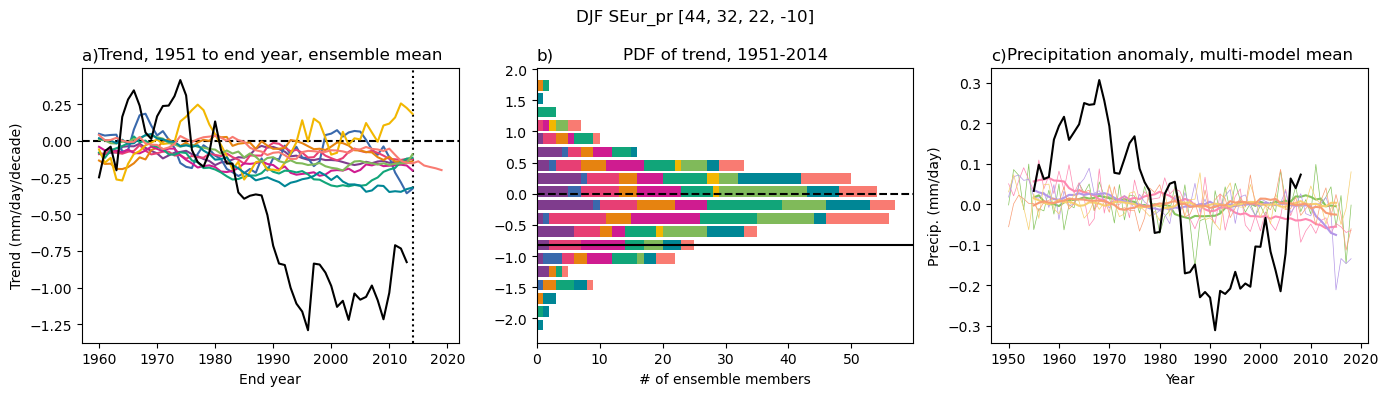

In [191]:
#
# PLOTTING
#
# HISTORICAL ensembles trend timeseries and PDFS. All experiments timeseries. 
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(14,4))

axs[0].axhline(0, color='k', linestyle='--')
axs[0].axvline(2014, color='k', linestyle=':')
axs[1].axhline(0, color='k', linestyle='--')

axs[1].axhline(OBS_pdf, color='k')

x = []; y = []
for i in trend_pdf:
    x.append(max(i)); y.append(min(i))
Cbins = np.linspace(min(y), max(x), 20)/10
Clist = []
for n, mod in enumerate(model): 
    axs[0].plot(np.arange(1960,2021), trend_ts[n,:]/10, color=col_dict[mod], label=mod)
    Clist.append(col_dict[mod])
    #axs[1].hist(trend_pdf[n]/10, bins=Cbins, orientation='horizontal', rwidth=0.8, color=col_dict[mod],alpha=.6)

axs[0].plot(np.arange(1960,2014), OBS_trend, color='k', label='20CRv3')
# Alternative - for a stacked histogram
xx = np.empty((65,10))
xx[:] = np.nan
for i in np.arange(10):
    print(i)
    xx[:len(trend_pdf[i]),i]=trend_pdf[i]
axs[1].hist(xx/10, bins=Cbins, orientation='horizontal', rwidth=0.8, color=Clist, stacked=True)

for n, expt in enumerate(exp):
    axs[2].plot(np.arange(1950,2021), mmm_ts[n,:]-np.nanmean(mmm_ts[n,:]), color=exp_col_dict[expt], linewidth=.5)
    axs[2].plot(np.arange(1955,2021-5), mmm_ts_10[n]-np.nanmean(mmm_ts_10[n]), color=exp_col_dict[expt], label=expt)

axs[2].plot(np.arange(1955,2014-5), OBS_10-np.nanmean(OBS_10), color='k', label='20CRv3')

axs[0].set_title('Trend, 1951 to end year, ensemble mean')
axs[0].set_title('a)', loc='left')
axs[0].set_xlabel('End year')
axs[0].set_ylabel('Trend (mm/day/decade)') ### CHECK UNITS
#axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axs[1].set_xlabel('# of ensemble members')
axs[1].set_title('PDF of trend, 1951-2014')
axs[1].set_title('b)', loc='left')

axs[2].set_title('c)', loc='left')
axs[2].set_title('Precipitation anomaly, multi-model mean')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Precip. (mm/day)') 
#axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('DJF '+reg_label+' '+str(R))
plt.tight_layout()